# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 1 декабря 23:59 [уточняется]**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

> Чтобы эксперименты можно было повторить.

> Чтобы случайность была не настолько случайной.

---



# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [133]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [4]:
df_train.sample(n=10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2305,Honda Amaze V CVT Petrol BSIV,2019,779000,7032,Petrol,Trustmark Dealer,Automatic,First Owner,19.0 kmpl,1199 CC,88.76 bhp,110Nm@ 4800rpm,5.0
4387,Hyundai Creta 1.6 CRDi SX Plus,2017,1150000,27000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
1686,Honda City i VTEC V,2017,860000,28000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
4706,Ford Figo Diesel LXI,2012,225000,60000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
6737,Honda Mobilio S i VTEC,2017,600000,70000,Petrol,Individual,Manual,First Owner,17.3 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,7.0
1651,Ford Endeavour 3.2 Titanium AT 4X4,2016,2280000,120000,Diesel,Individual,Automatic,Second Owner,10.91 kmpl,3198 CC,197 bhp,470Nm@ 1750-2500rpm,7.0
1528,Maruti Swift 1.3 VXi,2007,150000,70000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
6548,Maruti Wagon R VXI 1.2,2015,365000,28000,Petrol,Dealer,Manual,First Owner,20.52 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
6188,Honda City i DTec VX,2016,1000000,50000,Diesel,Individual,Manual,Second Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
5388,Hyundai EON Era,2014,225000,35000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0


In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [23]:
df_train.isnull().sum()

,0
name,6999
year,0
selling_price,0
km_driven,0
fuel,6999
seller_type,6999
transmission,6999
owner,6999
mileage,0
engine,0


In [8]:
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0].index.tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [9]:
df_train.duplicated().sum()

985

In [11]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f961279a31fef373bb9d305dab047ca6dcea13653e9b4fbdf7a41d07e0fbca84
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, explorative=True)
profile.to_file("cars_train_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Я немного переставил задания.

Если это не сильно критично...

Когда у меня вылезли ошибки при заполнении строк меданами.

Решил исправить данные. А это только 3 пункт, из-за исправлений данных полетело задание с копированием данных. Предупредил заранее)))

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [136]:
duplicate_mask = df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)
df_train[duplicate_mask].shape[0]

1799

In [137]:
df_train[duplicate_mask]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [138]:
df_train_unique = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [139]:
df_train_unique.reset_index(drop=True, inplace=True)
df_train_unique

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [140]:
df_train = df_train_unique
df_train.shape

(5840, 13)

In [141]:
assert df_train.shape == (5840, 13)

In [109]:
df_test.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 593.2+ KB


### Это я сделал посмотря в будущее

In [134]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [135]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [142]:
def convert_columns(df):
    def convert_mileage(value):
        if isinstance(value, float):
          return value
        if ' kmpl' in value:
            return float(value.replace(' kmpl', ''))
        elif ' km/kg' in value:
            return float(value.replace(' km/kg', '')) * 100
        else:
            return None

    def convert_engine(value):
        if isinstance(value, float):
          return value
        if ' CC' in value:
            return float(value.replace(' CC', ''))
        else:
            return None

    def convert_max_power(value):
        if isinstance(value, float):
          return value
        value = value.replace(' bhp', '')
        if len(value) > 0:
          return float(value)
        else:
          return None
    def extract_torque(torque_string):
      try:
          match = pd.Series(torque_string).str.extract(
              r'(\d+\.?\d*)\s*(\w+)(?:\s*at\s*(\d+-\d+)rpm|@?\s*(\d+)rpm)?'
          )

          torque_value = match[0].iloc[0]
          if torque_value and torque_value.replace('.', '', 1).isdigit():
              torque_value = float(torque_value)
          else:
              torque_value = np.nan

          rpm_range = match[2].iloc[0] if match[2].iloc[0] else (match[3].iloc[0] if match[3].iloc[0] else '0-0')
          rpm_range = rpm_range.replace(' ', '').split('-')

          if len(rpm_range) == 1:
            try:
                rpm_min = float(rpm_range[0])
                rpm_max = float(rpm_range[0])
            except ValueError:
                rpm_min, rpm_max = 0, 0
          elif len(rpm_range) == 2:
            try:
                rpm_min = float(rpm_range[0])
                rpm_max = float(rpm_range[1])
            except ValueError:
                rpm_min, rpm_max = 0, 0
          else:
            rpm_min, rpm_max = 0, 0
          return pd.Series([torque_value * ((rpm_max + rpm_min) / 2)])
      except Exception as e:
          return pd.Series([np.nan])

    df['mileage'] = df['mileage'].apply(convert_mileage)

    df['engine'] = df['engine'].apply(convert_engine)

    df['max_power'] = df['max_power'].apply(convert_max_power)

    df_train[['torque']] = df['torque'].apply(extract_torque)
    return df

df_train = convert_columns(df_train)
df_test = convert_columns(df_test)

df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,NaN,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,NaN,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,NaN,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,NaN,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,NaN,5.0


In [105]:
df_train.sample(n=10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,horse_power
4582,Mahindra Xylo D2 BS IV,2010,465000,77088,Diesel,Individual,Manual,First Owner,14.00,2489.0,95.00,8.0,NaN
177,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,2660.00,998.0,58.16,5.0,NaN
167,Mahindra KUV 100 mFALCON G80 K8,2016,450000,15000,Petrol,Individual,Manual,Second Owner,18.15,1198.0,82.00,6.0,NaN
3722,Ford Ecosport 1.5 Diesel Titanium,2016,725000,30000,Diesel,Individual,Manual,First Owner,21.70,1498.0,98.96,5.0,NaN
2339,Maruti Ritz VDi,2010,220000,100000,Diesel,Individual,Manual,First Owner,21.10,1248.0,73.90,5.0,NaN
1047,Mahindra Ssangyong Rexton RX7,2013,800000,117000,Diesel,Dealer,Automatic,First Owner,11.18,2696.0,184.00,7.0,NaN
4676,Volkswagen CrossPolo 1.5 TDI,2014,300000,84000,Diesel,Individual,Manual,Second Owner,20.14,1498.0,88.50,5.0,NaN
3955,Maruti 800 AC LPG,2008,149000,87540,LPG,Individual,Manual,Third Owner,1660.00,796.0,35.50,5.0,NaN
2534,Chevrolet Tavera Neo 3 LS 10 Seats BSIII,2015,580000,110000,Diesel,Individual,Manual,Second Owner,13.58,2499.0,72.40,10.0,NaN
1501,Hyundai EON Sportz,2018,444000,15000,Petrol,Individual,Manual,First Owner,21.10,814.0,55.20,5.0,NaN


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [143]:
numeric_cols = df_train.select_dtypes(include=[np.number])

def fill_missing_with_median(df):
  for column in numeric_cols.columns:
    median_value = df_train[column].median()
    df[column].fillna(median_value, inplace=True)
  return df
df_train = fill_missing_with_median(df_train)
df_test = fill_missing_with_median(df_train)

df_train.isnull().sum()

<ipython-input-143-4387fd116379>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [124]:
df_train.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,186
engine,186


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
# Я это уже сделал выше)))) Даже torque оставил.

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [126]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [127]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,47.979483,1429.448973,87.906371,157500.000000,5.426712
std,4.095622,5.354320e+05,6.007114e+04,256.238951,485.662834,31.640418,5606.350227,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,50400.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,157500.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.440000,1248.000000,81.860000,157500.000000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,157500.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3344.000000,3604.000000,400.000000,264600.000000,14.000000


In [128]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [129]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,47.979483,1429.448973,87.906371,157500.000000,5.426712
std,4.095622,5.354320e+05,6.007114e+04,256.238951,485.662834,31.640418,5606.350227,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,50400.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,157500.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.440000,1248.000000,81.860000,157500.000000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,157500.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3344.000000,3604.000000,400.000000,264600.000000,14.000000


### Где-то в далеке выше я сделал describe

Посмотрел. Меня всё устроило.

In [130]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [131]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

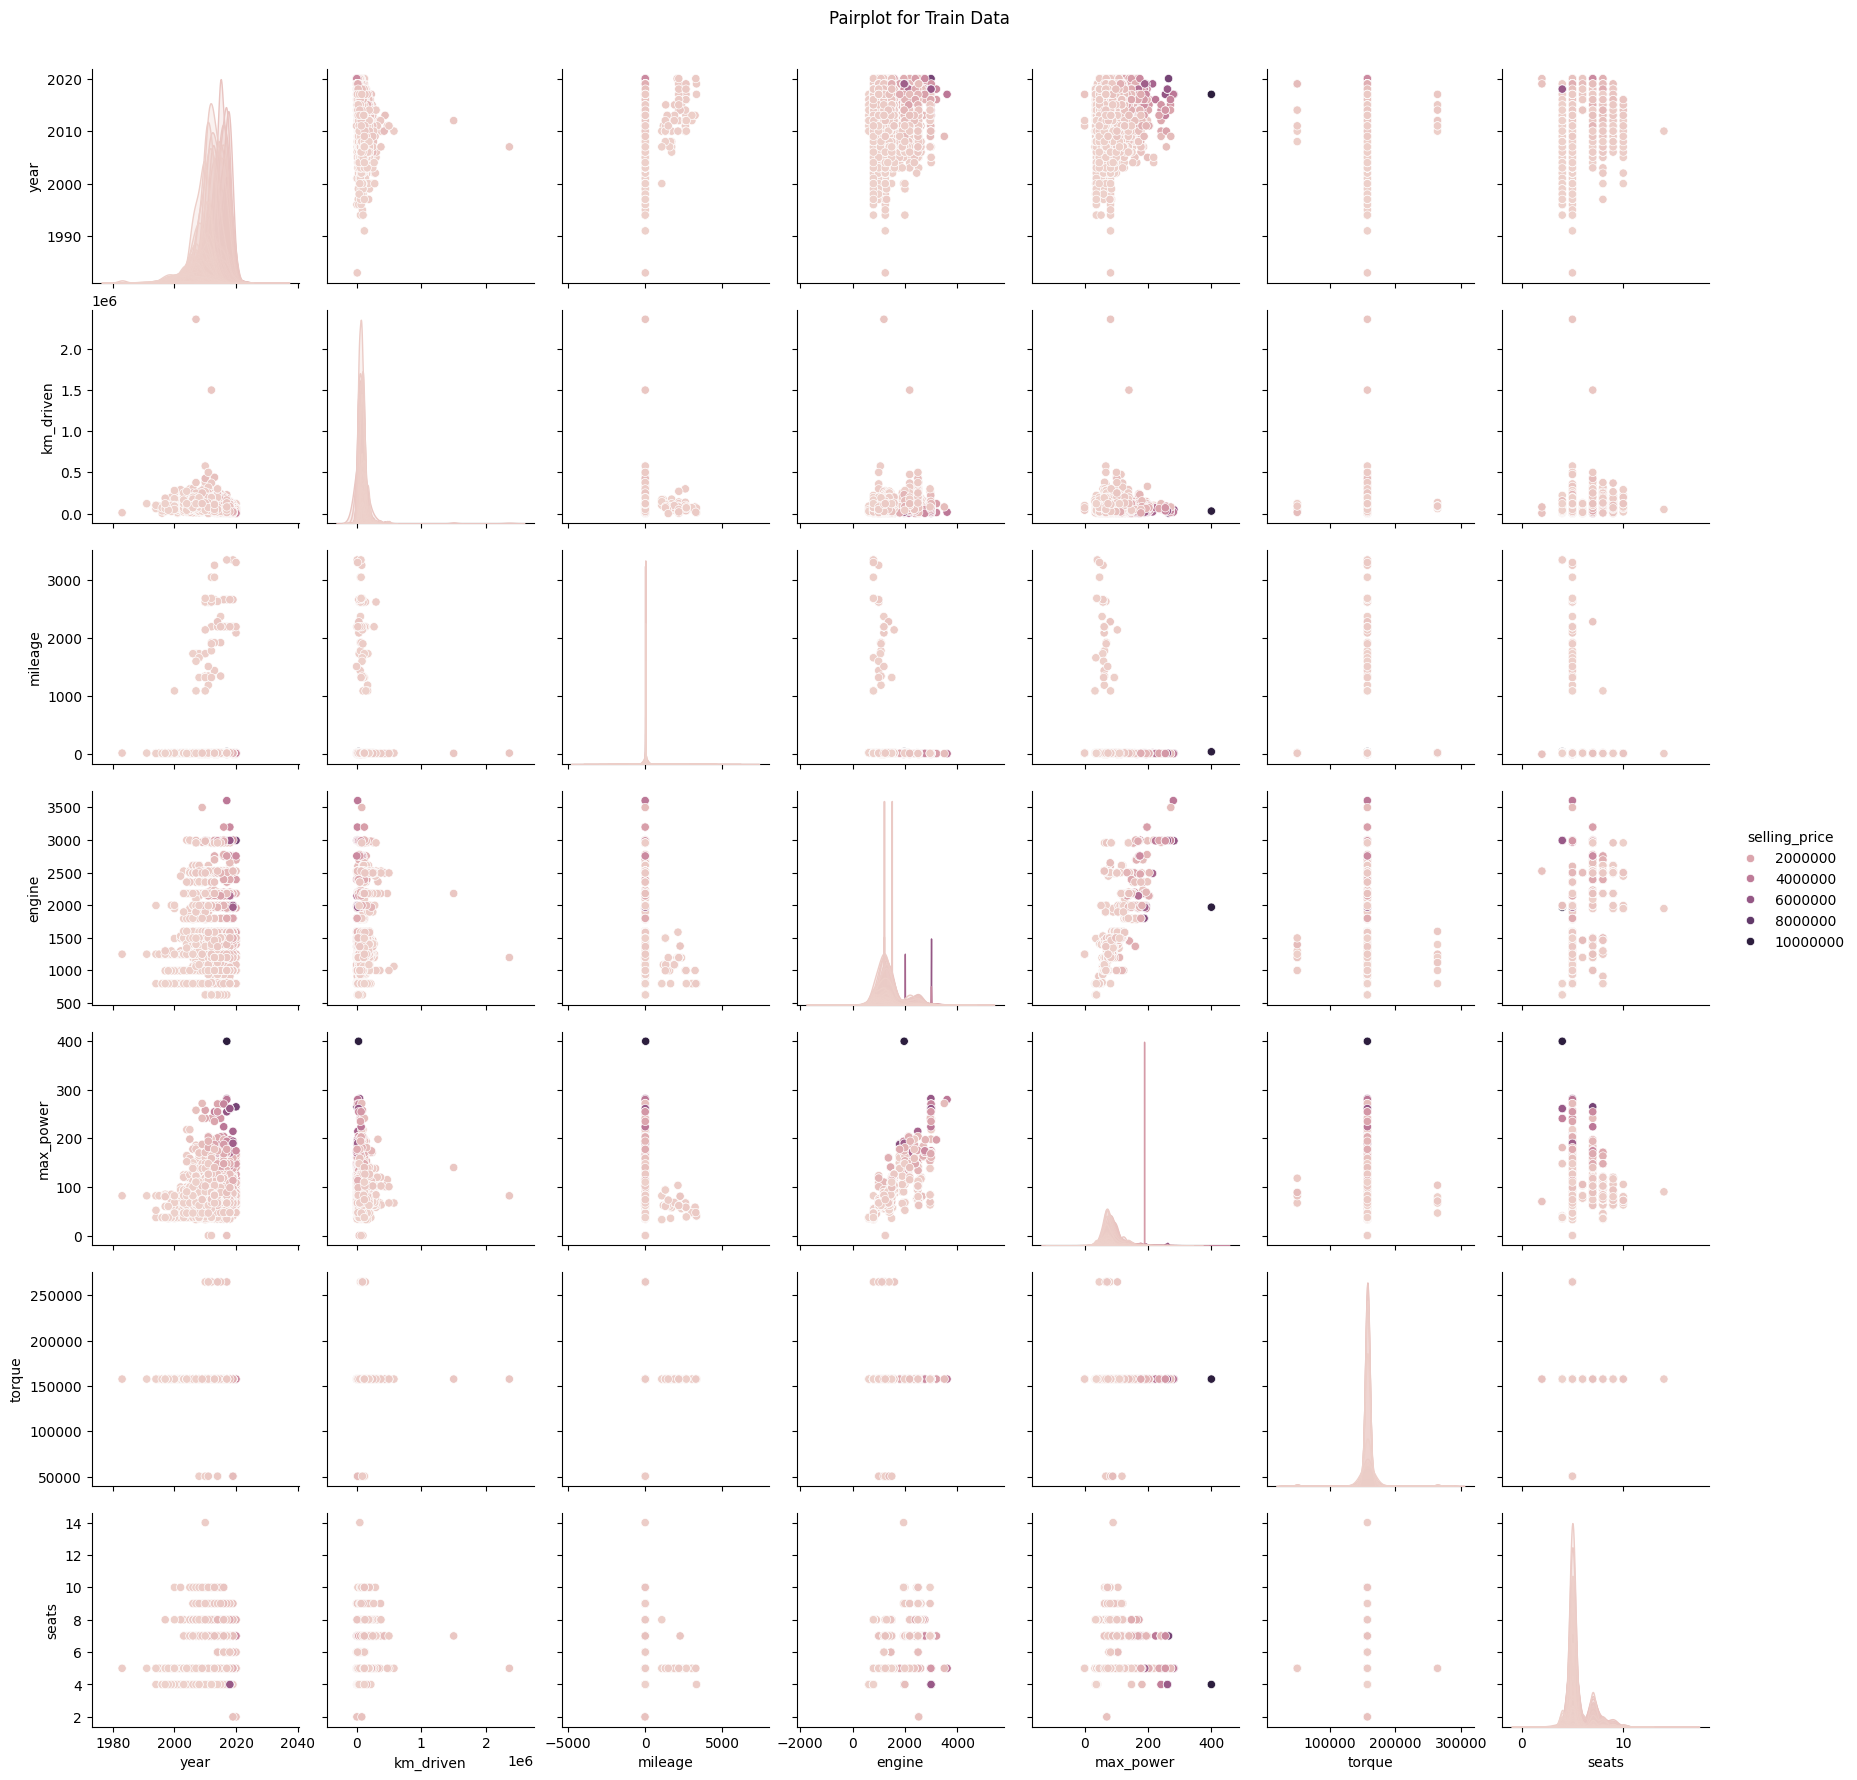

In [144]:
sns.pairplot(df_train, diag_kind='kde', hue='selling_price')
plt.suptitle('Pairplot for Train Data', y=1.02)
plt.show()

#### Ответы на вопросы



 - Немного да. Чем правее, тем выше цена. То есть больше - дороже
 - Да, если два признака показывают схожие распределения, то это может означать положительную или отрицательную корреляцию.

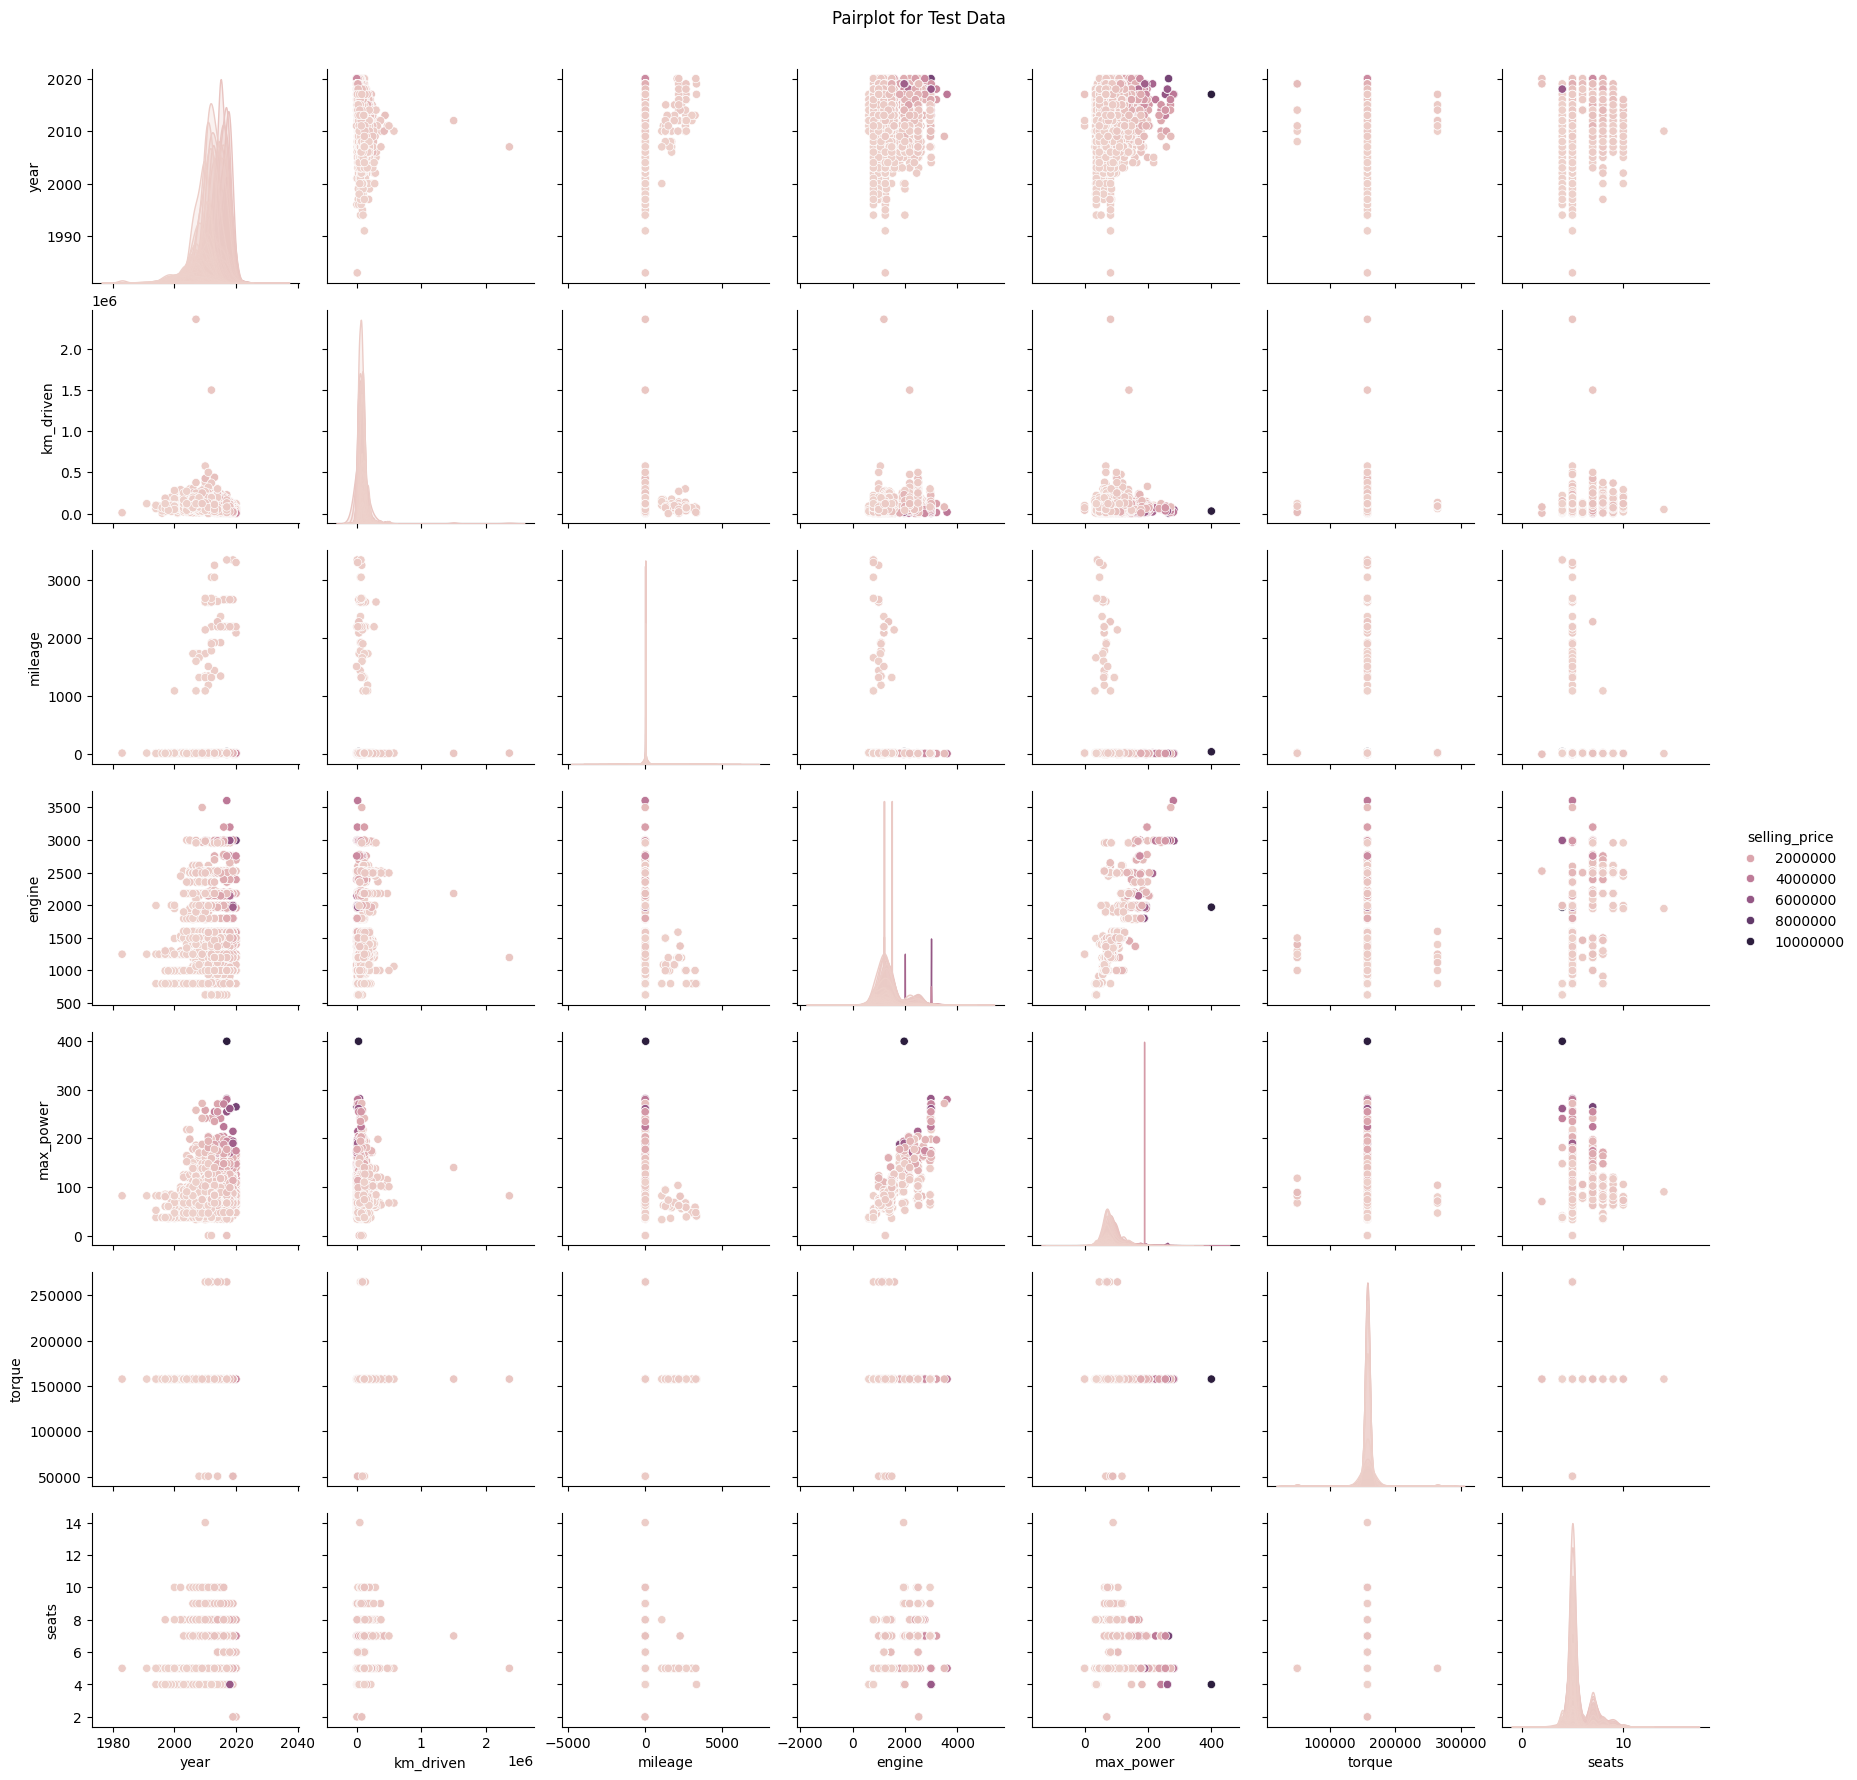

In [146]:
sns.pairplot(df_test, diag_kind='kde', hue='selling_price')
plt.suptitle('Pairplot for Test Data', y=1.02)
plt.show()

Да, похожи.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


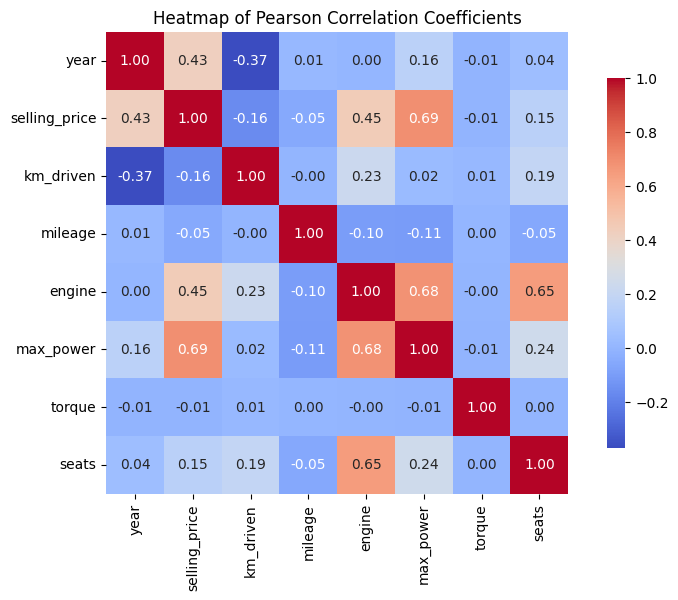

In [150]:
numeric_df = df_train.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Pearson Correlation Coefficients')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?

 > Пробег и Количество проеденных километром. Мотор и год

 - Между какими наблюдается довольно сильная положительная линейная зависимость?

 > Мощность и мотор. Мотор и количество сидений

 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

 > Да. Относительно. У них неплохая отрицательная корреляция

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

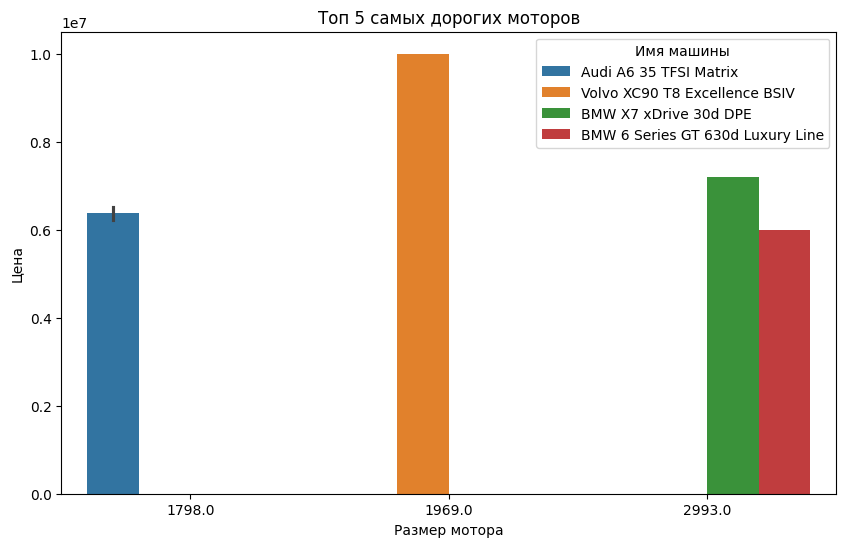

In [152]:
df_sorted = df_train.sort_values(by='selling_price', ascending=False)

top_engines = df_sorted[['name', 'engine', 'selling_price']].head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='engine', y='selling_price', data=top_engines, hue='name')
plt.title('Топ 5 самых дорогих моторов')
plt.xlabel('Размер мотора')
plt.ylabel('Цена')
plt.legend(title='Имя машины')
plt.show()

Не важно какого размера у тебя мотор, Volvo будет дороже.

Вот такие великие выводы я сделал

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
y_train = # your code here
X_train = # your code here

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_test = # your code here
X_test = # your code here

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# your code here

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# your code here

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

# your code here

In [ ]:
# your code here

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here

In [ ]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

# your code here

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# your code here

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    # your code here

business_metric(# your code here)

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

